In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split

from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


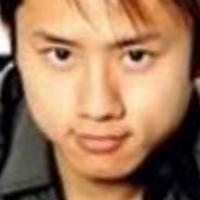

26 0


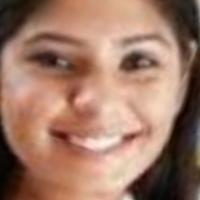

21 1


In [2]:
import os
from PIL import Image
import pandas as pd

images = []
ages = []
genders = []

for i in os.listdir('../input/utkface-new/crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('../input/utkface-new/crop_part1/' + i))

images = pd.Series(list(images), name='Images')
ages = pd.Series(list(ages), name='Ages')
genders = pd.Series(list(genders), name='Genders')

df = pd.concat([images, ages, genders], axis=1)
df

display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


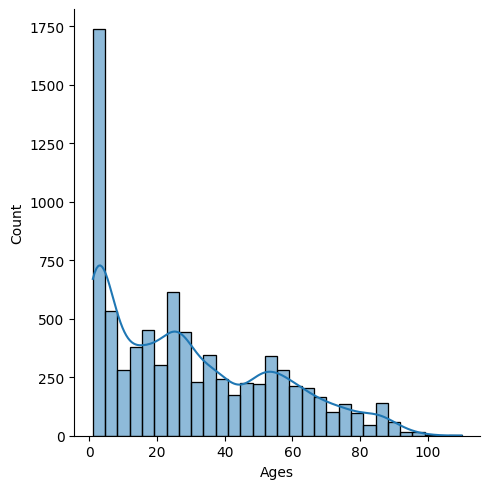

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


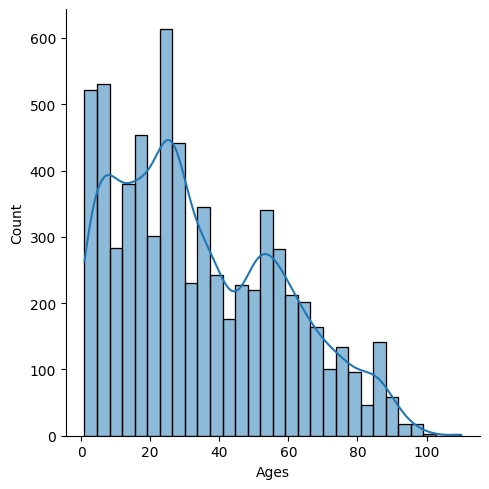

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


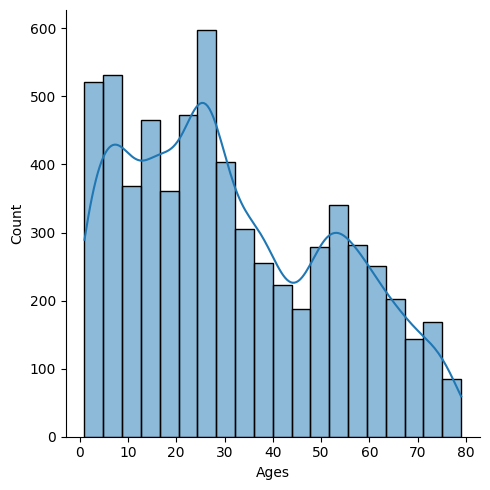

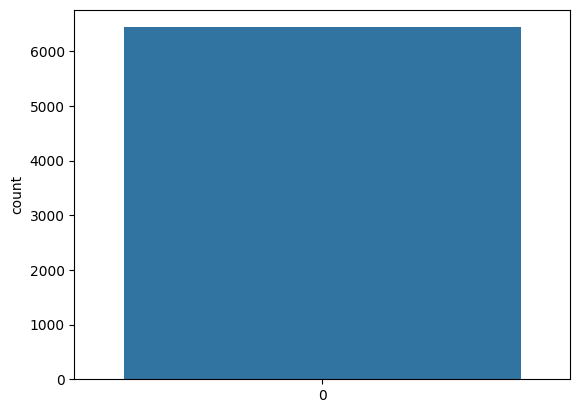

In [3]:
import matplotlib.pyplot as plt


# Plot initial age distribution
sns.displot(df['Ages'], kde=True, bins=30)
plt.show()

# Filter and sample data for ages <= 4
under4s = df[df['Ages'] <= 4].sample(frac=0.3)
df = pd.concat([df[df['Ages'] > 4], under4s], ignore_index=True)

# Plot age distribution after filtering
sns.displot(df['Ages'], kde=True, bins=30)
plt.show()

# Remove ages > 80
df = df[df['Ages'] < 80]

# Plot age distribution after removing ages > 80
sns.displot(df['Ages'], kde=True, bins=20)
plt.show()

# Remove entries with gender = 3
df = df[df['Genders'] != 3]

# Plot gender distribution after filtering gender = 3
sns.countplot(df['Genders'])
plt.show()

# Resize images and prepare data for training
x = []
y = []

for i in range(len(df)):
    resized_image = df['Images'].iloc[i].resize((200, 200), Image.LANCZOS).copy()
    ar = np.asarray(resized_image)
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)

x = np.array(x)

# Continue with the rest of your code as needed

In [4]:
#Inception v3
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split

from keras.applications import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical



y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [5]:
from tensorflow.keras import layers

# Age Model with InceptionV3
age_model_inception = Sequential()
inception_model_age = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

age_model_inception.add(inception_model_age)
age_model_inception.add(GlobalAveragePooling2D())
age_model_inception.add(Dense(128, activation='relu'))
age_model_inception.add(Dropout(0.5))
age_model_inception.add(Dense(64, activation='relu'))
age_model_inception.add(Dropout(0.5))
age_model_inception.add(Dense(1, activation='linear'))  # Linear activation for regression

age_model_inception.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Gender Model with InceptionV3
gender_model_inception = Sequential()
inception_model_gender = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

gender_model_inception.add(inception_model_gender)
gender_model_inception.add(GlobalAveragePooling2D())
gender_model_inception.add(Dense(128, activation='relu'))
gender_model_inception.add(Dropout(0.5))
gender_model_inception.add(Dense(64, activation='relu'))
gender_model_inception.add(Dropout(0.5))
gender_model_inception.add(Dense(1, activation='sigmoid'))

gender_model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
# Training the Models

# Age Model Training
datagen_age = ImageDataGenerator(
    rescale=1./255., width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

test_datagen_age = ImageDataGenerator(rescale=1./255)

train_age = datagen_age.flow(x_train_age, y_train_age, batch_size=32)
test_age = test_datagen_age.flow(x_test_age, y_test_age, batch_size=32)

history_age_inception = age_model_inception.fit(train_age, epochs=5, shuffle=True, validation_data=test_age)

# Gender Model Training
datagen_gender = ImageDataGenerator(
    rescale=1./255., width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

test_datagen_gender = ImageDataGenerator(rescale=1./255)

train_gender = datagen_gender.flow(x_train_gender, y_train_gender, batch_size=64)
test_gender = test_datagen_gender.flow(x_test_gender, y_test_gender, batch_size=64)

history_gender_inception = gender_model_inception.fit(train_gender, epochs=50, shuffle=True, validation_data=test_gender)

Epoch 1/5
161/161 [==============================] - 82s 275ms/step - loss: 348.5178 - accuracy: 0.0417 - val_loss: 418.3717 - val_accuracy: 0.0419
Epoch 2/5
161/161 [==============================] - 42s 259ms/step - loss: 220.0188 - accuracy: 0.0421 - val_loss: 402.0785 - val_accuracy: 0.0419
Epoch 3/5
161/161 [==============================] - 42s 262ms/step - loss: 189.6732 - accuracy: 0.0421 - val_loss: 182.7988 - val_accuracy: 0.0419
Epoch 4/5
161/161 [==============================] - 42s 260ms/step - loss: 172.5434 - accuracy: 0.0421 - val_loss: 148.6032 - val_accuracy: 0.0419
Epoch 5/5
161/161 [==============================] - 43s 267ms/step - loss: 157.1580 - accuracy: 0.0421 - val_loss: 92.1299 - val_accuracy: 0.0419
Epoch 1/50
81/81 [==============================] - 78s 512ms/step - loss: 0.6267 - accuracy: 0.6735 - val_loss: 0.9292 - val_accuracy: 0.5714
Epoch 2/50
81/81 [==============================] - 42s 511ms/step - loss: 0.4353 - accuracy: 0.8063 - val_loss: 642.0

In [10]:

# Evaluate the Gender Model on the test dataset
test_loss_gender_inception, test_accuracy_gender_inception = gender_model_inception.evaluate(test_gender)
print(f'Test Gender Model Accuracy (Inception): {test_accuracy_gender_inception * 100:.2f}%')

21/21 [==============================] - 1s 61ms/step - loss: 0.5326 - accuracy: 0.8967
Test Gender Model Accuracy (Inception): 89.67%


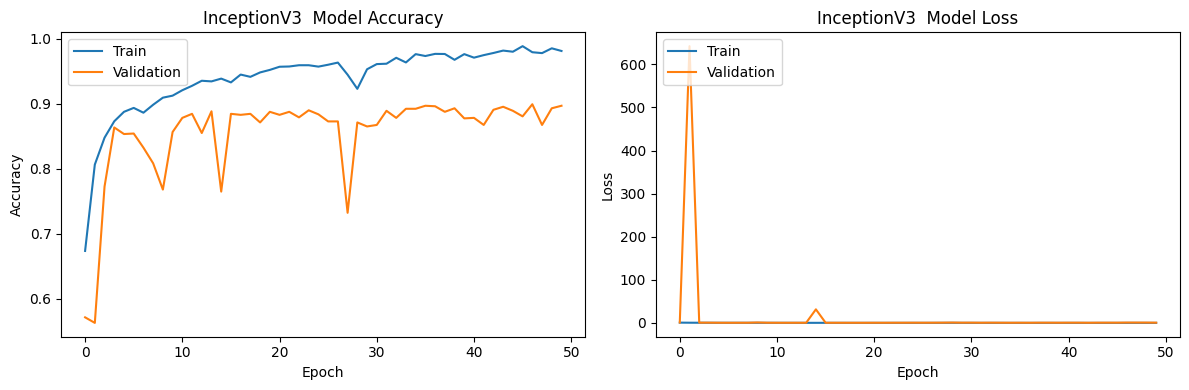

In [8]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()




# Plot InceptionV3 Gender Model
plot_history(history_gender_inception, 'InceptionV3 ')